In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

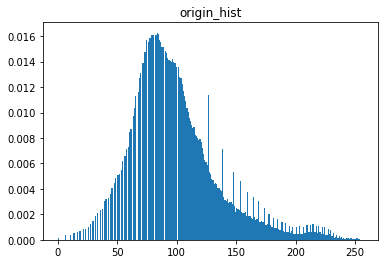

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('aerial_view.tif',cv2.IMREAD_GRAYSCALE)
cv2.imwrite('origin.jpg',img)
img2 = img.flatten()
plt.hist(img2,256,[0,256],density=True)
plt.title('origin_hist')
plt.savefig('origin_hist.png')
plt.show()

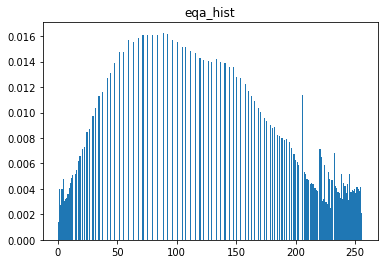

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('aerial_view.tif',cv2.IMREAD_GRAYSCALE)
img_flat = img.flatten()
img_eq = np.zeros([480,480])
hist_eqa = np.zeros([256])
mn = len(img_flat)
for i in img_flat:
    hist_eqa[i] += 1.0/mn
for i in range(1,len(hist_eqa)):
    hist_eqa[i] = hist_eqa[i-1] + hist_eqa[i]
hist_eqa = np.around(255*hist_eqa)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_eq[i,j] = hist_eqa[img[i,j]]

cv2.imwrite('eqa.jpg',img_eq)
plt.hist(img_eq.flatten(),256,[0,256],density=True)
plt.title('eqa_hist')
plt.savefig('eqa_hist.png')
plt.show()

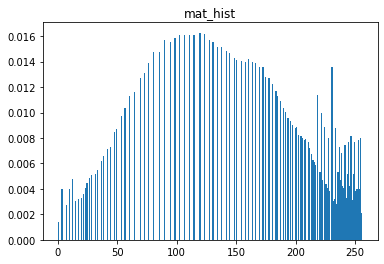

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('aerial_view.tif',cv2.IMREAD_GRAYSCALE)
img_flat = img.flatten()
img_eq = np.zeros([480,480])
hist_eqa = np.zeros([256])
mn = len(img_flat)

for i in img_flat:
    hist_eqa[i] += 1/mn
for i in range(1,len(hist_eqa)):
    hist_eqa[i] = hist_eqa[i-1] + hist_eqa[i]
hist_eqa = np.around(255*hist_eqa)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_eq[i,j] = hist_eqa[img[i,j]]

img_mat = np.zeros([480,480])
hist_mat = np.zeros([256])
z = 0
for i in range(256):
    z = z + pow(i,0.4)
c = 1/z
for i in range(1,len(hist_mat)):
    hist_mat[i] = hist_mat[i-1] + c*pow(i,0.4)
hist_mat = np.around(255*hist_mat)

temp = np.zeros([256])
z_index = 0
for i in range(256):
    while hist_eqa[i] > hist_mat[z_index]:
        z_index += 1
        if z_index > 255:
            z_index = 255
            break
    temp[i] = z_index
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_mat[i,j] = temp[int(img[i,j])]

cv2.imwrite('mat.jpg',img_mat)
plt.hist(img_mat.flatten(),256,[0,256],density=True)
plt.title('mat_hist')
plt.savefig('mat_hist.png')
plt.show()

In [77]:
img_mat

array([[250., 250., 250., ...,   0.,   0.,   0.],
       [250., 249., 249., ...,   0.,   0.,   0.],
       [247., 247., 248., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])